Measure model fit

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

In [2]:
d = pd.read_csv("../experiments/veres-fate-all/kegg-softplus_2_400-1e-06/seed_1/interpolate.log", sep = "\t")
d = d.loc[d['epoch'] != 'best']
d['epoch'] = d['epoch'].apply(lambda e: int(e.split('_')[1]))
d.head()

,epoch,t_cur,0,1,2,3,4,5,6,7
7,100,1,38.856689,59.957275,84.283310,79.050461,102.837997,123.590424,128.996094,137.807327
8,100,2,79.015335,65.028023,73.897293,62.111000,84.927261,101.148735,104.797874,112.905350
9,100,3,102.764008,73.171684,72.173172,54.860729,74.179947,86.062759,88.467400,95.610695
10,100,4,121.546341,83.159409,74.622498,51.104965,66.141136,73.061607,74.491592,80.204956
11,100,5,146.121460,100.909912,83.719711,52.990261,61.197716,62.077522,63.210377,66.816742


For a given t_cur, plot

In [3]:
sns.set_style('white')

Text(0.5, 4.5, 'Actual')

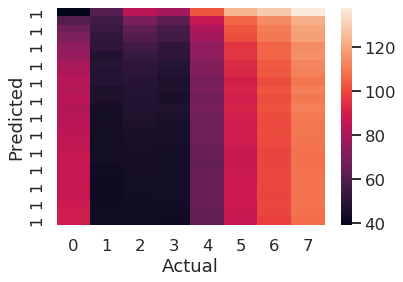

In [4]:
d_ = d.loc[d['t_cur'] == 1].set_index('t_cur')
g = sns.heatmap(d_.drop(['epoch'], axis = 1))
g.set_ylabel('Predicted')
g.set_xlabel('Actual')

Text(0.5, 4.5, 'Actual')

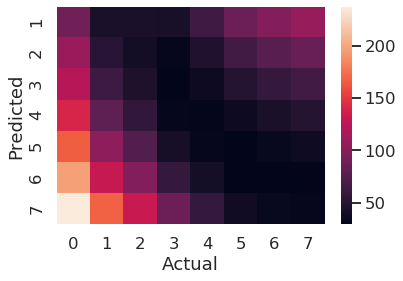

In [5]:
g = sns.heatmap(d.loc[d['epoch'] == 2500].set_index('t_cur').drop(['epoch'], axis = 1))
g.set_ylabel('Predicted')
g.set_xlabel('Actual')

Plot all

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7')]

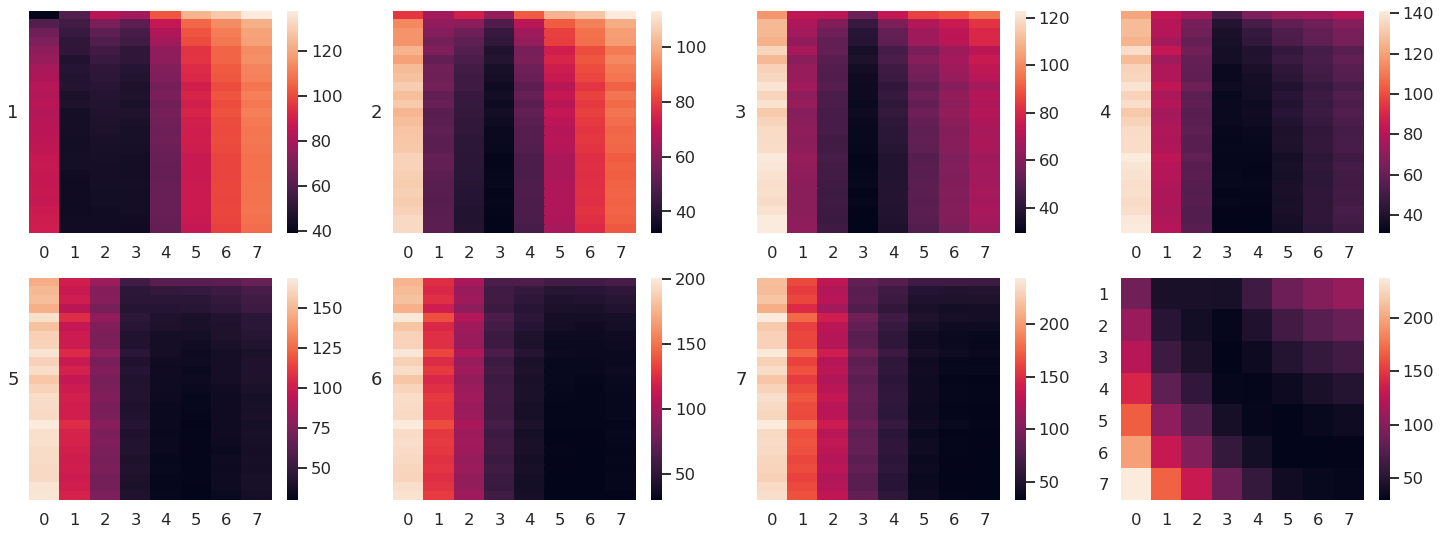

In [6]:
fig, ax = plt.subplots(2, 4, figsize = (25, 9))
ax = ax.flatten()

for i in range(7):

    d_ = d.loc[d['t_cur'] == i+1].set_index('t_cur')
    g = sns.heatmap(d_.drop(['epoch'], axis = 1), ax = ax[i])
    g.set_ylabel(i+1, rotation = 0)
    g.set_xlabel('')
    g.set_yticklabels('')

g = sns.heatmap(d.loc[d['epoch'] == 2500].set_index('t_cur').drop(
    ['epoch'], axis = 1), ax = ax[-1])
g.set_ylabel('')
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

Compare across models

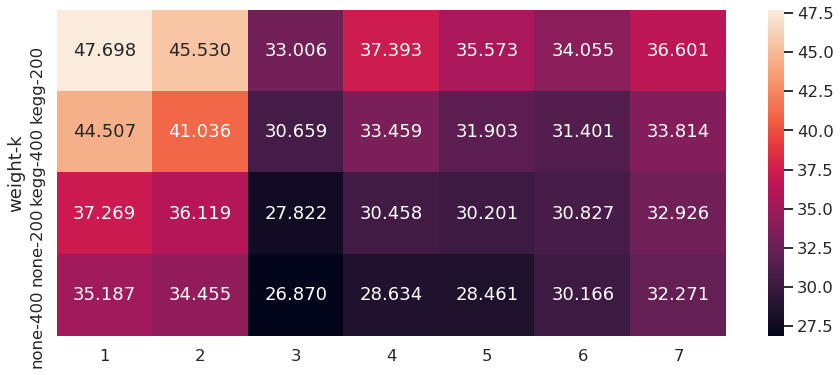

In [73]:
weight = ['none', 'kegg']
ks = [200, 400]

results = []

for w in weight: 
    
    for k in ks:

        for s in range(5): 

            seed = s + 1

            d = pd.read_csv("../experiments/veres-fate-all/{}-softplus_2_{}-1e-06/seed_{}/interpolate.log".format(w, k, seed), sep = "\t")
            d = d.loc[d['epoch'] != 'best']
            d['epoch'] = d['epoch'].apply(lambda e: int(e.split('_')[1]))

            last = d.loc[d['epoch'] == 1500]
            best = [w, k, seed] + [last.iloc[i-1][str(i)] for i in range(1, 8)]
            results.append(best)
            
results = pd.DataFrame(results, columns = ['weight', 'k', 'seed'] + [1, 2, 3, 4, 5, 6, 7])
summary = results.drop('seed', axis = 1).groupby(['weight', 'k']).mean()

fig, ax = plt.subplots(figsize = (15, 6))
sns.heatmap(summary, annot = True, fmt = '.3f', ax = ax)

Report results across seeds at each time point individually

In [81]:
summary2 = results.groupby(['weight', 'k'])[[1, 2, 3, 4, 5, 6, 7]].describe().loc[
    :,pd.IndexSlice[:,['mean', 'std']]]
summary2

1                    2                    3            \
                 mean       std       mean       std       mean       std   
weight k                                                                    
kegg   200  47.698102  1.278621  45.529562  1.281164  33.005770  0.653175   
       400  44.506833  0.975163  41.035904  1.203425  30.658540  0.447485   
none   200  37.269491  0.782018  36.118530  0.675930  27.822274  0.649033   
       400  35.186798  0.527543  34.454748  0.685684  26.869645  0.569485   

                    4                    5                    6            \
                 mean       std       mean       std       mean       std   
weight k                                                                    
kegg   200  37.392603  0.688309  35.572803  0.757223  34.055358  0.477855   
       400  33.458734  0.653228  31.903102  0.560185  31.400880  0.438756   
none   200  30.457592  1.120466  30.201361  1.084116  30.827129  1.102445   
       400  28.634129  0.729165  28.461406  0.440144  30.166190  0.228228   

                    7            
                 mean       std  
weight k                         
kegg   200  36.600809  0.451526  
       400  33.813741  0.609638  
none   200  32.925980  0.774792  
       400  32.270867  0.373114

In [103]:
for t in [1, 2, 3, 4, 5, 6, 7]:
    print('{} &'.format(t))
    for weight in ['none', 'kegg']: 
        for k in [200, 400]:
            s = summary2.loc[(weight, k)]
            print('{:.2f} $\pm$ {:.2f} &'.format(s.loc[t, 'mean'], s.loc[t, 'std']))

1 &
37.27 $\pm$ 0.78 &
35.19 $\pm$ 0.53 &
47.70 $\pm$ 1.28 &
44.51 $\pm$ 0.98 &
2 &
36.12 $\pm$ 0.68 &
34.45 $\pm$ 0.69 &
45.53 $\pm$ 1.28 &
41.04 $\pm$ 1.20 &
3 &
27.82 $\pm$ 0.65 &
26.87 $\pm$ 0.57 &
33.01 $\pm$ 0.65 &
30.66 $\pm$ 0.45 &
4 &
30.46 $\pm$ 1.12 &
28.63 $\pm$ 0.73 &
37.39 $\pm$ 0.69 &
33.46 $\pm$ 0.65 &
5 &
30.20 $\pm$ 1.08 &
28.46 $\pm$ 0.44 &
35.57 $\pm$ 0.76 &
31.90 $\pm$ 0.56 &
6 &
30.83 $\pm$ 1.10 &
30.17 $\pm$ 0.23 &
34.06 $\pm$ 0.48 &
31.40 $\pm$ 0.44 &
7 &
32.93 $\pm$ 0.77 &
32.27 $\pm$ 0.37 &
36.60 $\pm$ 0.45 &
33.81 $\pm$ 0.61 &


Plot across epochs

Text(0, 0.5, 'Sum of distance\nacross time points')

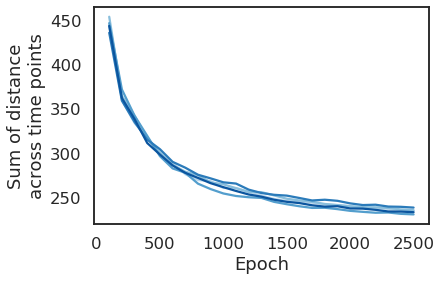

In [102]:
w = 'kegg'
k = 400

results = []

for s in range(5): 

    seed = s + 1

    d = pd.read_csv("../experiments/veres-fate-all/{}-softplus_2_{}-1e-06/seed_{}/interpolate.log".format(w, k, seed), sep = "\t")
    d = d.loc[d['epoch'] != 'best']
    d['epoch'] = d['epoch'].apply(lambda e: int(e.split('_')[1]))

    for e in d['epoch'].unique(): 
        last = d.loc[d['epoch'] == e]
        best = [e, seed] + [last.iloc[i-1][str(i)] for i in range(1, 8)]
        results.append(best)
            
results = pd.DataFrame(results, columns = ['epoch', 'seed'] + [1, 2, 3, 4, 5, 6, 7])
summary = results.set_index(['epoch', 'seed']).sum(axis = 1)

fig, ax = plt.subplots(figsize = (6, 4))
cmap = sns.color_palette("Blues")
for seed, s in summary.groupby(level = 1):
    ax.plot(s.index.get_level_values(0), s.values, c = cmap[seed])
ax.set_xlabel('Epoch')    
ax.set_ylabel('Sum of distance\nacross time points')

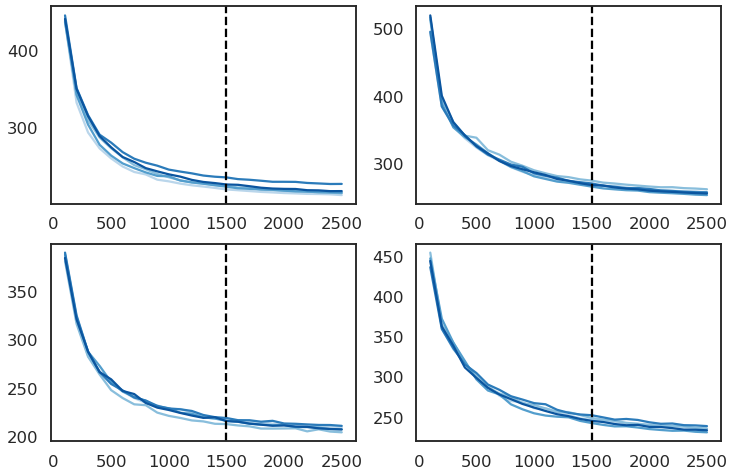

In [117]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8))
axs = ax.flatten()

i = 0

for k in [200, 400]:
    for w in ['none', 'kegg']: 
        
        ax = axs[i]
        i += 1
        
        results = []
        for s in range(5): 

            seed = s + 1

            d = pd.read_csv("../experiments/veres-fate-all/{}-softplus_2_{}-1e-06/seed_{}/interpolate.log".format(w, k, seed), sep = "\t")
            d = d.loc[d['epoch'] != 'best']
            d['epoch'] = d['epoch'].apply(lambda e: int(e.split('_')[1]))

            for e in d['epoch'].unique(): 
                last = d.loc[d['epoch'] == e]
                best = [e, seed] + [last.iloc[i-1][str(i)] for i in range(1, 8)]
                results.append(best)

        results = pd.DataFrame(results, columns = ['epoch', 'seed'] + [1, 2, 3, 4, 5, 6, 7])
        summary = results.set_index(['epoch', 'seed']).sum(axis = 1)

        cmap = sns.color_palette("Blues")
        for seed, s in summary.groupby(level = 1):
            ax.plot(s.index.get_level_values(0), s.values, c = cmap[seed])
        #ax.set_title('{} {}'.format(w, k))
        ax.axvline(1500, linestyle = 'dashed', color = 'k')